# Import the required Libraries

In [ ]:
# install Spotipy
# Spotify is an audio streaming and media services provider
!pip install spotipy

In [10]:
# install yellowbrick & Plotly
# Visualization libraries
!pip install yellowbrick
!pip install plotly

     |████████████████████████████████| 13.2 MB 3.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=682fc6f3d653189a04aac8e3ee2adacb8a0d114cba64b237a902813857a987dc
  Stored in directory: /Users/python/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [8]:
# install kneed
# This repository is an attempt to implement the kneedle algorithm, published here. Given a set of x and y values, kneed will return the knee point of the function. The knee point is the point of maximum curvature.

!pip install kneed


In [4]:
import sys
import spotipy
import yaml
import spotipy.util as util
from spotipy.oauth2 import SpotifyOAuth
from pprint import pprint
import json
import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

In [5]:
sp_df=pd.read_csv('Spotify_rollingstone500.csv')


# Identifying columns with misleading data

In [6]:
for column in sp_df:
    no_value=sp_df[column].eq(0).sum()
    if no_value>0:
        print(f'{no_value}   number of value 0 in column {column}')   

1   number of value 0 in column Unnamed: 0
163   number of value 0 in column instrumentalness


In [7]:
# Drop unname and instrumentalness columns
sp_df.drop(sp_df.columns[0], axis=1,inplace=True)
sp_df.drop(columns=['instrumentalness'],inplace=True)
sp_df.shape

(524, 12)

object
object
object
float64
float64
float64
float64
float64
float64
float64
float64
object


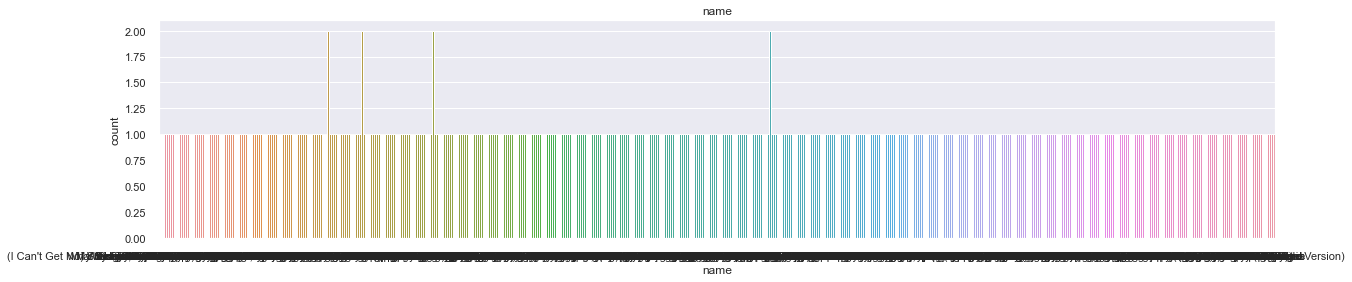

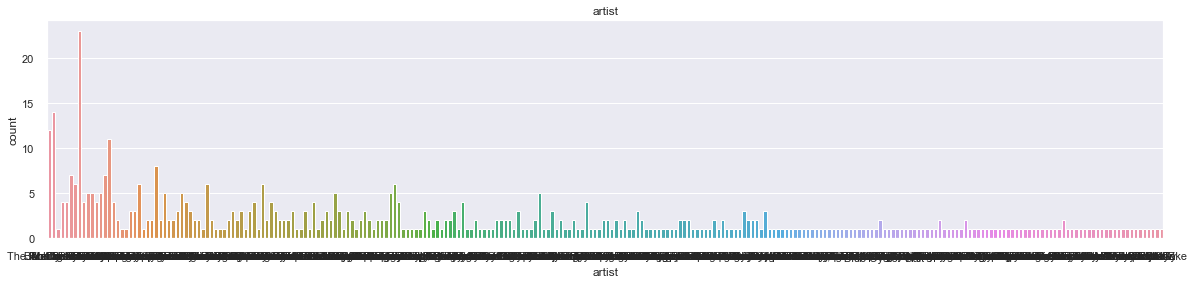

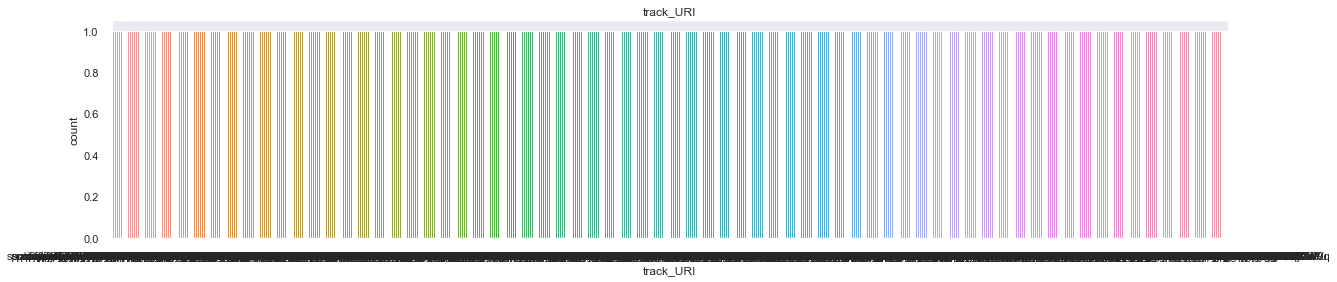

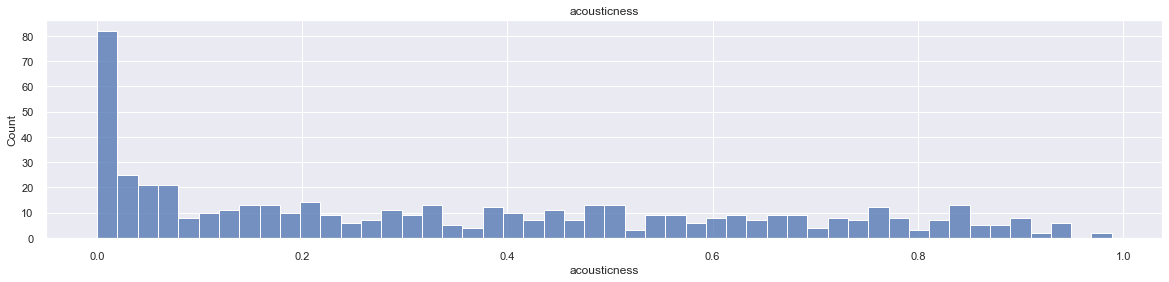

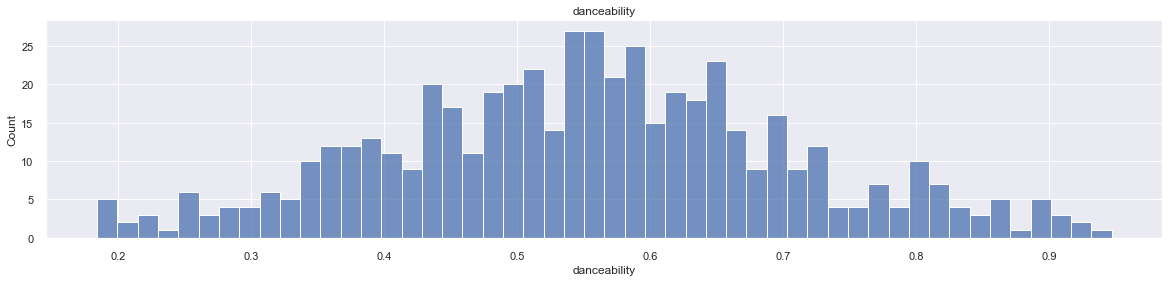

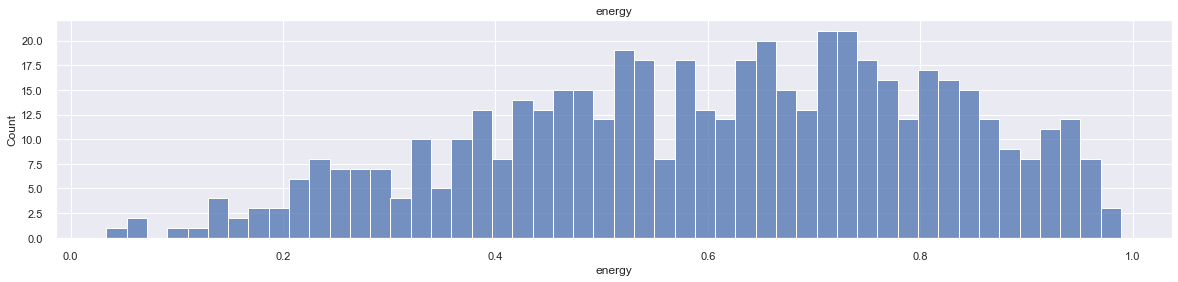

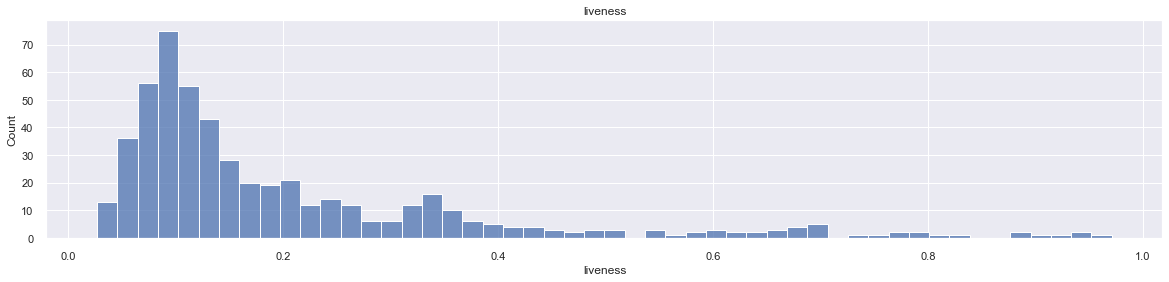

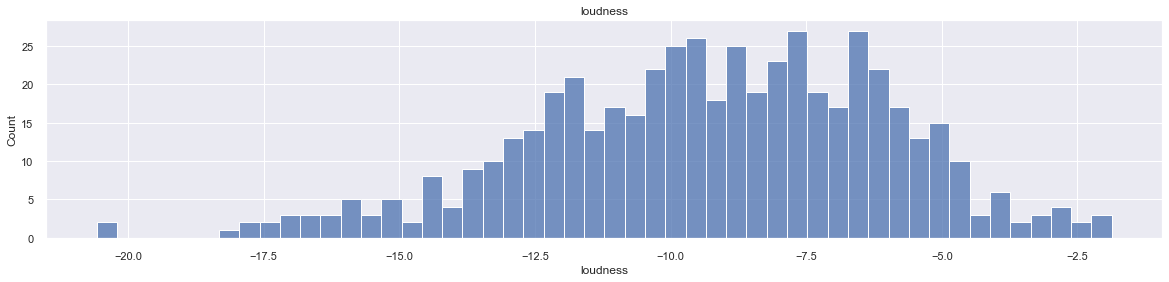

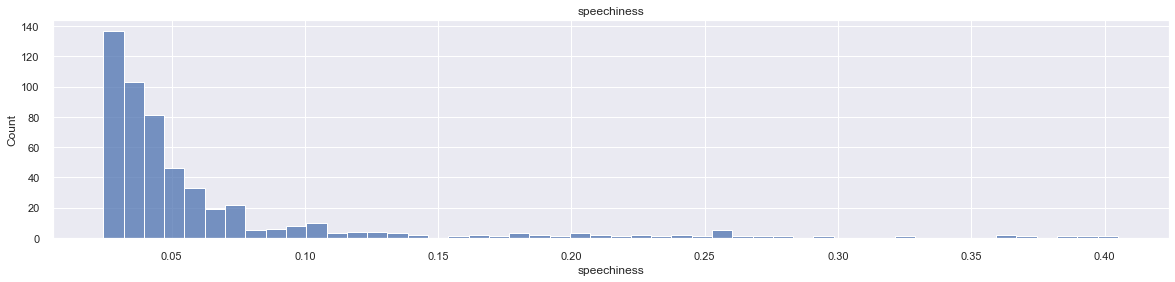

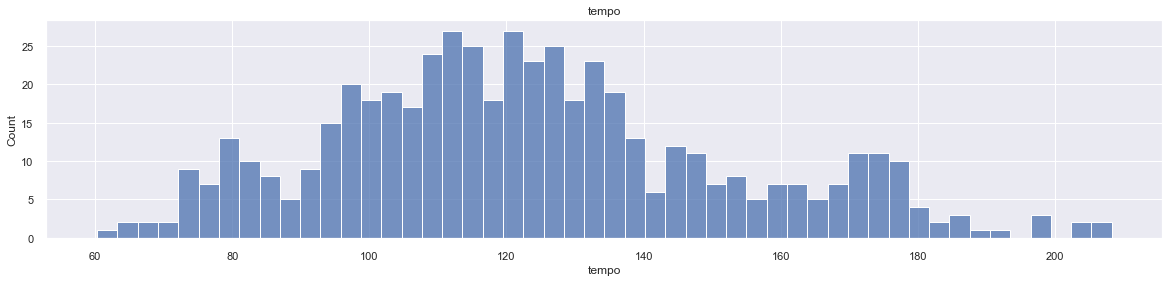

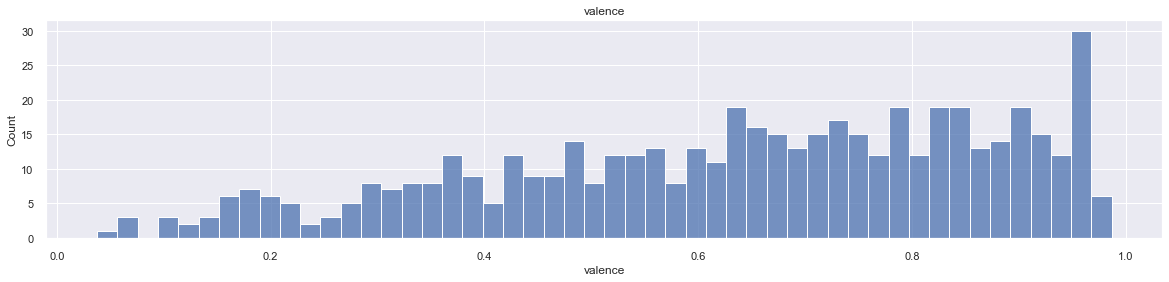

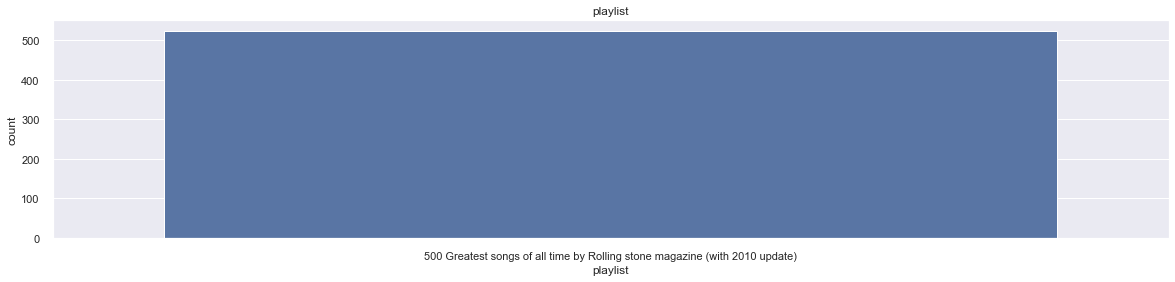

In [217]:

for column in sp_df:
    if sp_df[column].dtype == np.float64:
        plt.figure(column,figsize=(20,4))
        plt.title(column)
        print(sp_df[column].dtype)
        sns.histplot(data=sp_df, x=column,bins=50)
        
    elif pd.api.types.is_string_dtype(sp_df[column]):
        print(sp_df[column].dtype)
        plt.figure(column,figsize=(20,4))
        plt.title(column)
        fig=sns.countplot(x=column,data=sp_df)